### Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import seaborn as sns


df = pd.read_csv("../data/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


# Regresión en función de AVG. AREA INCOME

In [71]:
X_income = df['Avg. Area Income']
y = df['Price']

In [72]:
# Se parte el conjunto en "train" y "test".
X_income_train, X_income_test, y_income_train, y_income_test = train_test_split(X_income, y, test_size=0.2, random_state=101)

In [73]:
X_income_train = np.array(X_income_train)
X_income_test = np.array(X_income_test)

In [74]:
print(X_income_train.shape)
print(X_income_test.shape)

(4000,)
(1000,)


In [75]:
X_income_train = X_income_train.reshape(-1, 1)
X_income_test = X_income_test.reshape(-1, 1)

In [76]:
print(X_income_train.shape)
print(X_income_test.shape)

(4000, 1)
(1000, 1)


In [77]:
# Se crea la variable que representa el modelo
reglin_income = LinearRegression()

In [78]:
# Se entrena el modelo con el conjunto "train"
reglin_income.fit(X_income_train, y_income_train)

LinearRegression()

In [79]:
print("Secante (income):", reglin_income.intercept_)
print("Pendiente (income):", reglin_income.coef_)

Secante (income): -215047.77188411704
Pendiente (income): [21.08845731]


In [80]:
print("Score TRAIN (income):", reglin_income.score(X_income_train, y_income_train) *100)
print("Score TEST (income):", reglin_income.score(X_income_test, y_income_test) *100)

Score TRAIN (income): 40.63479319730665
Score TEST (income): 41.93148429872476


In [81]:
income_predictions = reglin_income.predict(X_income_test)

In [82]:
X_income = np.array(X_income).reshape(-1, 1)
X_income

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

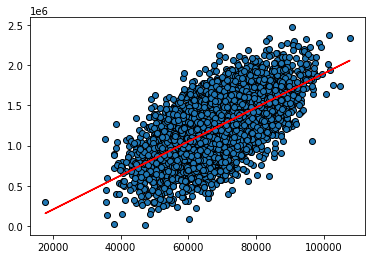

In [83]:
# Se grafica la dispersión de puntos para TODOS los valores del dataset y su recta de ajuste.

plt.scatter(X_income, y, edgecolor='black')
plt.plot(X_income, reglin_income.predict(X_income), c = 'r')

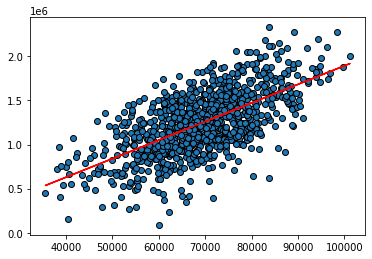

In [84]:
# Se grafica la dispersion de los puntos del grupo de TEST y la recta de predicciones.

plt.scatter(X_income_test, y_income_test, edgecolor='black')
plt.plot(X_income_test, reglin_income.predict(X_income_test), c = 'r')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

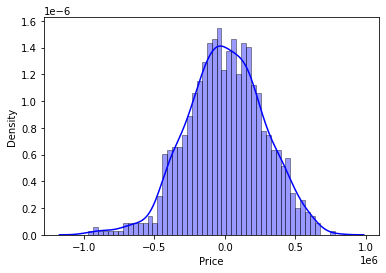

In [85]:
sns.distplot((y_income_test - income_predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [86]:
print('MAE (income):', metrics.mean_absolute_error(y_income_test, income_predictions))
print('MSE (income):', metrics.mean_squared_error(y_income_test, income_predictions))
print('RMSE (income):', np.sqrt(metrics.mean_squared_error(y_income_test, income_predictions)))

MAE (income): 217619.5644321996
MSE (income): 74402787880.48894
RMSE (income): 272768.7443247282


# Regresión en función de AVG. AREA HOUSE AGE

In [87]:
X_age = df['Avg. Area House Age']
y = df['Price']

In [88]:
# Se parte el conjunto en "train" y "test".
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y, test_size=0.2)

In [89]:
X_age_train = np.array(X_age_train)
X_age_test = np.array(X_age_test)

In [90]:
print(X_age_train.shape)
print(X_age_test.shape)

(4000,)
(1000,)


In [91]:
X_age_train = X_age_train.reshape(-1, 1)
X_age_test = X_age_test.reshape(-1, 1)

In [92]:
print(X_age_train.shape)
print(X_age_test.shape)

(4000, 1)
(1000, 1)


In [93]:
# Se crea la variable que representa el modelo
reglin_age = LinearRegression()

In [94]:
# Se entrena el modelo con el conjunto "train"
reglin_age.fit(X_age_train, y_age_train)

LinearRegression()

In [95]:
print("Secante (age):", reglin_age.intercept_)
print("Pendiente (age):", reglin_age.coef_)

Secante (age): 270525.4065734666
Pendiente (age): [161354.03343197]


In [96]:
print("Score TRAIN (age):", reglin_age.score(X_age_train, y_age_train) *100)
print("Score TEST (age):", reglin_age.score(X_age_test, y_age_test) *100)

Score TRAIN (age): 20.73888879900756
Score TEST (age): 19.176599942126295


In [97]:
age_predictions = reglin_age.predict(X_age_test)

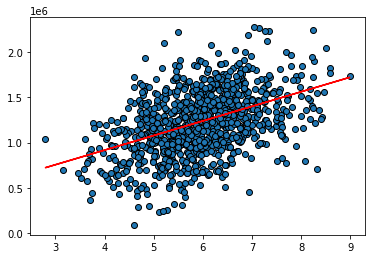

In [98]:
# Se grafica la dispersion de puntos del grupo TEST y la rescta de ajuste.

plt.scatter(X_age_test, y_age_test, edgecolor='black')
plt.plot(X_age_test, age_predictions, c = 'r')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

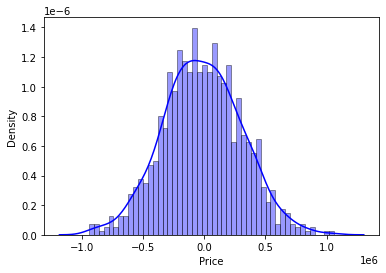

In [99]:
sns.distplot((y_age_test - age_predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [100]:
print('MAE (age):', metrics.mean_absolute_error(y_age_test, age_predictions))
print('MSE (age):', metrics.mean_squared_error(y_age_test, age_predictions))
print('RMSE (age):', np.sqrt(metrics.mean_squared_error(y_age_test, age_predictions)))

MAE (age): 256410.2766155745
MSE (age): 102430487022.95958
RMSE (age): 320047.632428299


# Regresión en función de AVG. AREA NUMBER OF ROOMS

In [101]:
X_rooms = df['Avg. Area Number of Rooms']
y = df['Price']

In [102]:
# Se parte el conjunto en "train" y "test".
def regresion_lineal(X, y):
    global predictions
    global y_test
    global X_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    print("Shape X_train:", X_train.shape)
    print("Shape X_test:", X_test.shape)
    print('')
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    print("Shape X_train:", X_train.shape)
    print("Shape X_test:", X_test.shape)
    print('')
    # Se crea la variable que representa el modelo
    reglin = LinearRegression()
    # Se entrena el modelo con el conjunto "train"
    reglin.fit(X_train, y_train)
    print("Secante:", reglin.intercept_)
    print("Pendiente:", reglin.coef_)
    print('')
    print("Score TRAIN:", reglin.score(X_train, y_train) *100)
    print("Score TEST:", reglin.score(X_test, y_test) *100)
    predictions = reglin.predict(X_test)
    print('')
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('=============================================================================================================================')
    return y_test, predictions, X_test

In [103]:
regresion_lineal(X_rooms, y)

Shape X_train: (4000,)
Shape X_test: (1000,)

Shape X_train: (4000, 1)
Shape X_test: (1000, 1)

Secante: 425452.8660808399
Pendiente: [115505.81918246]

Score TRAIN: 10.922289005921016
Score TEST: 12.582301244200833

MAE: 266620.75250525825
MSE: 111528275403.25763
RMSE: 333958.49353363906


(4632    1.625167e+06
 3716    1.393897e+06
 4097    1.384787e+06
 1645    9.459312e+05
 275     1.202988e+06
             ...     
 3877    1.204401e+06
 2283    1.090789e+06
 3060    1.072875e+06
 1687    1.007225e+06
 605     1.163742e+06
 Name: Price, Length: 1000, dtype: float64,
 array([1306164.44902324, 1241186.01378679, 1328375.67128188,
        1073968.60612791, 1264656.08519336, 1227478.05957339,
        1265917.3452797 , 1181244.30040199, 1200656.69632247,
        1200882.01041498, 1343319.05437662,  901946.49116734,
        1447181.53063267, 1192098.24762389, 1291434.5944198 ,
        1256332.86447096, 1230518.02827221, 1123144.28932076,
        1523627.61536528, 1210646.30525094, 1258807.84882521,
        1400371.66464485, 1172713.80139115, 1204616.29361691,
        1208826.75364492, 1136068.17334248, 1245676.94462822,
        1461182.68544987, 1281245.66337356, 1292997.78134065,
        1354781.29750545, 1128378.27716543, 1055927.51345159,
        1443269.34267318, 103922

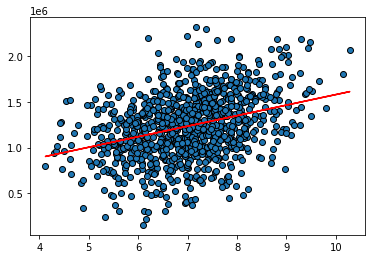

In [104]:
# Se grafica la dispersion de los puntos del conjunto TEST y la recta de ajuste de la predicción.

plt.scatter(X_test, y_test, edgecolor='black')
plt.plot(X_test, predictions, c = 'r')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

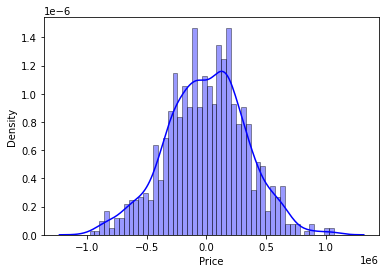

In [105]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

# Regresión en función de AVG. AREA NUMBER OF BEDROOMS

In [106]:
X_bedrooms = df['Avg. Area Number of Bedrooms']
y = df['Price']

In [107]:
regresion_lineal(X_bedrooms, y)

Shape X_train: (4000,)
Shape X_test: (1000,)

Shape X_train: (4000, 1)
Shape X_test: (1000, 1)

Secante: 1030716.2735055417
Pendiente: [50865.31049528]

Score TRAIN: 3.1361977188610335
Score TEST: 2.0293173205333193

MAE: 278436.4758149619
MSE: 120032836908.80922
RMSE: 346457.5542671991


(4324    5.557557e+05
 4601    8.264837e+05
 2429    1.202453e+06
 2572    1.642011e+06
 3749    1.151190e+06
             ...     
 1525    1.348873e+06
 417     2.106511e+06
 116     9.469430e+05
 19      1.030591e+06
 2189    1.241699e+06
 Name: Price, Length: 1000, dtype: float64,
 array([1133464.200706  , 1237229.43411637, 1301319.72534042,
        1140076.69107039, 1255032.29278972, 1259101.51762934,
        1142619.95659515, 1346081.19857627, 1191450.65467062,
        1299285.11292061, 1144145.91591001, 1249437.10863524,
        1303862.99086519, 1290638.01013642, 1199080.45124491,
        1249945.76174019, 1198063.14503501, 1140585.34417534,
        1200097.75745482, 1189416.04225081, 1188907.38914586,
        1350659.07652084, 1359306.17930504, 1242824.61827085,
        1152284.36558926, 1196537.18572015, 1252489.02726496,
        1234177.51548666, 1257066.90520953, 1252997.68036991,
        1194502.57330034, 1294707.23497604, 1154318.97800907,
        1351676.38273075, 124536

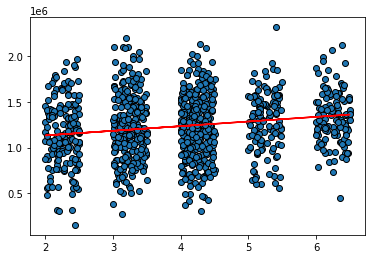

In [108]:
# Se grafica la dispersion de los puntos del conjunto TEST y la recta de ajuste de la prediccion.

plt.scatter(X_test, y_test, edgecolor='black')
plt.plot(X_test, predictions, c = 'r')



C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

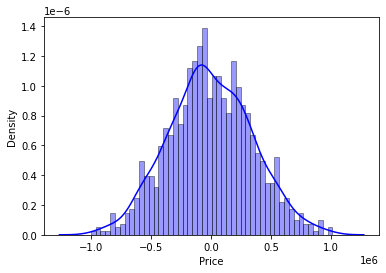

In [109]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

# Regresión en función de AVG. AREA POPULATION

In [110]:
X_population = df['Area Population']
y = df['Price']

In [111]:
regresion_lineal(X_population, y)

Shape X_train: (4000,)
Shape X_test: (1000,)

Shape X_train: (4000, 1)
Shape X_test: (1000, 1)

Secante: 711135.7795962108
Pendiente: [14.4815369]

Score TRAIN: 16.460513168878833
Score TEST: 17.500399225715146

MAE: 253889.6781112377
MSE: 99058713783.95168
RMSE: 314735.94294892927


(3498    1.432013e+06
 7       1.573937e+06
 1104    1.151282e+06
 1341    1.176421e+06
 3711    1.479296e+06
             ...     
 4174    1.084012e+06
 3433    1.252692e+06
 449     1.361219e+06
 4739    9.365537e+05
 3200    1.835565e+06
 Name: Price, Length: 1000, dtype: float64,
 array([1255282.94464664, 1239948.77944345, 1081778.68278967,
        1244128.00181412, 1204234.05656613, 1262007.62978234,
        1012405.23158579, 1073639.58821825, 1419409.95984535,
        1104017.03401718, 1206562.7127496 , 1150909.35579066,
        1091306.95914802, 1111103.70896339, 1164330.44391717,
        1477890.24029392, 1249429.15209649, 1051793.68962124,
        1026496.2651789 , 1349817.27208038, 1112648.78131807,
        1432996.8827657 , 1584170.3372136 , 1416312.25144732,
        1210422.4736447 , 1116733.15508767, 1592022.31317802,
        1268028.28036416, 1156247.94957156, 1320340.64154156,
        1184612.28326775, 1202731.41545204, 1446105.54990748,
        1514128.4144899 , 116324

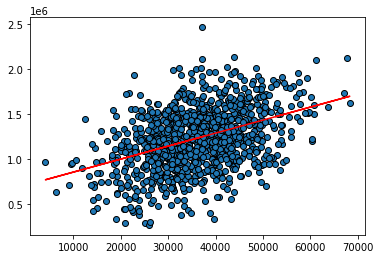

In [112]:
# Se grafica la dispersion de los puntos del conjunto TEST y la recta de ajuste de la prediccion.

plt.scatter(X_test, y_test, edgecolor='black')
plt.plot(X_test, predictions, c = 'r')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

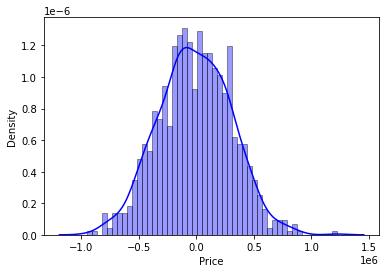

In [113]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')